In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [121]:
path = r'C:\Users\maria\Desktop\Data Science\01_PROJETO_INTEGRADOR\HISTORICO.xlsx'
data = pd.read_excel(path, sheet_name = 'SQL Results',delimiter = ',')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 4 columns):
DIA    1670 non-null datetime64[ns]
VDA    1670 non-null float64
CMV    1670 non-null float64
MTA    1670 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 52.3 KB


In [4]:
data.head()

DIA       VDA       CMV  MTA
0 2015-01-02   8612.12   7498.66  0.0
1 2015-01-03  11836.79  10337.33  0.0
2 2015-01-04   3874.22   3387.06  0.0
3 2015-01-05   3457.79   3053.94  0.0
4 2015-01-06   8812.50   8644.14  0.0

In [5]:
data.corr()

VDA       CMV       MTA
VDA  1.000000  0.993862  0.596276
CMV  0.993862  1.000000  0.617280
MTA  0.596276  0.617280  1.000000

In [6]:
df = pd.DataFrame({'ds': data['DIA'], 'y': data['VDA']})
df.head()

ds         y
0 2015-01-02   8612.12
1 2015-01-03  11836.79
2 2015-01-04   3874.22
3 2015-01-05   3457.79
4 2015-01-06   8812.50

In [7]:
df.tail()

ds         y
1665 2019-07-27  17433.34
1666 2019-07-28   6299.95
1667 2019-07-29   2664.87
1668 2019-07-30   4209.87
1669 2019-07-31   6348.06

In [8]:
df.describe()

y
count   1670.000000
mean    7666.805545
std     5622.961692
min        0.000000
25%     3804.352500
50%     5972.280000
75%     9849.370000
max    56959.830000

In [9]:
df.shape

(1670, 2)

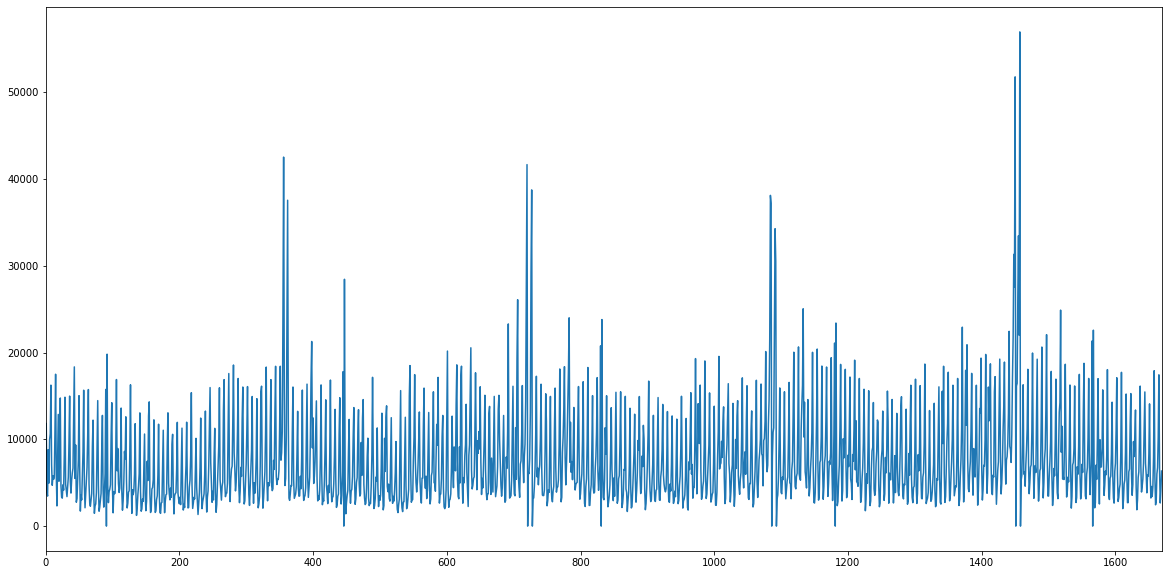

In [10]:
plt.figure(figsize=(20,10))
df['y'].plot()

(array([185., 605., 374., 178., 114., 111.,  55.,  20.,  10.,   5.,   3.,
          1.,   1.,   4.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0.    ,  2847.9915,  5695.983 ,  8543.9745, 11391.966 ,
        14239.9575, 17087.949 , 19935.9405, 22783.932 , 25631.9235,
        28479.915 , 31327.9065, 34175.898 , 37023.8895, 39871.881 ,
        42719.8725, 45567.864 , 48415.8555, 51263.847 , 54111.8385,
        56959.83  ]),
 <a list of 20 Patch objects>)

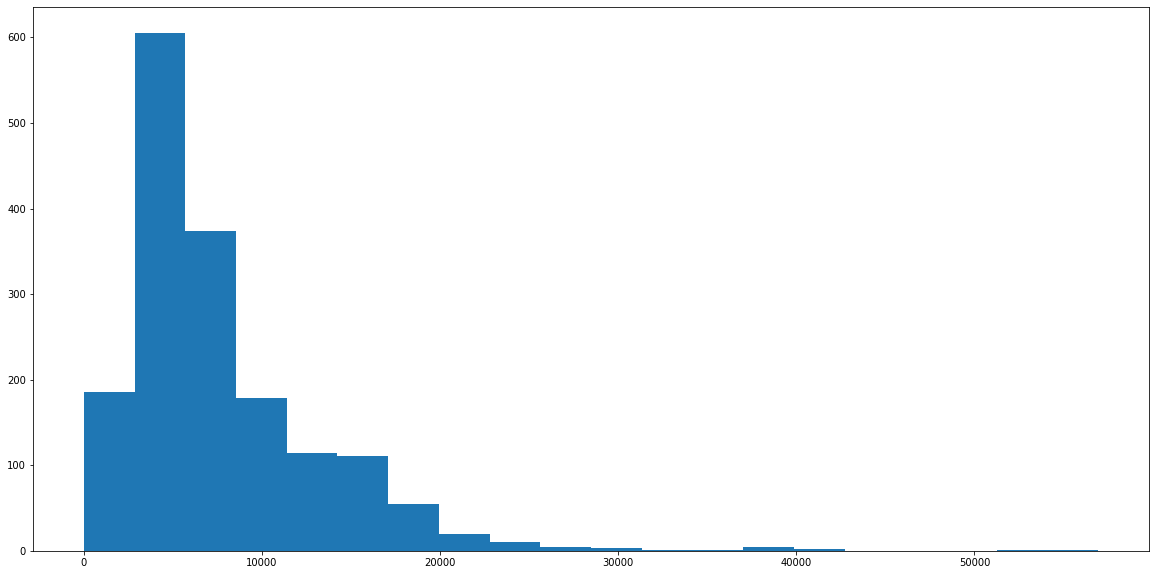

In [11]:
plt.figure(figsize=(20,10))
plt.hist(df['y'], bins = 20)

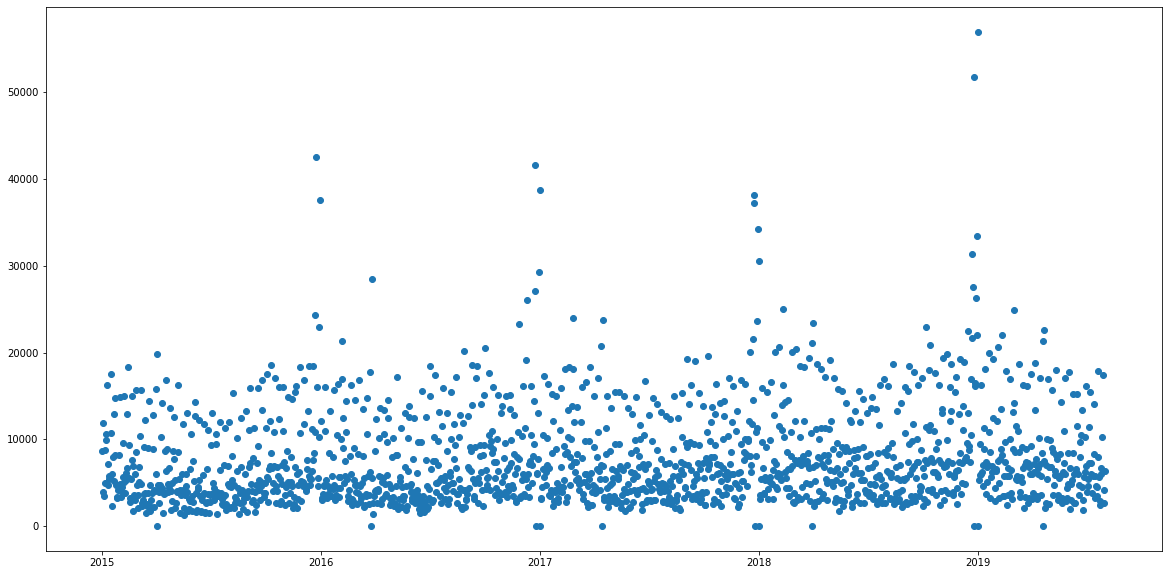

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(y = df['y'], x= df.ds)

In [12]:
# bash
! pip install fbprophet

In [13]:
len(data)

1670

In [14]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=True)

m.fit(df )

In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
2030 2020-07-26
2031 2020-07-27
2032 2020-07-28
2033 2020-07-29
2034 2020-07-30

In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
2030 2020-07-26  7156.279083  2731.329585  10927.473628
2031 2020-07-27  4720.989413   623.646631   8958.259149
2032 2020-07-28  4696.795949   722.727988   8568.423210
2033 2020-07-29  6699.473576  2734.691731  10867.266485
2034 2020-07-30  7768.962802  3693.786871  12084.390463

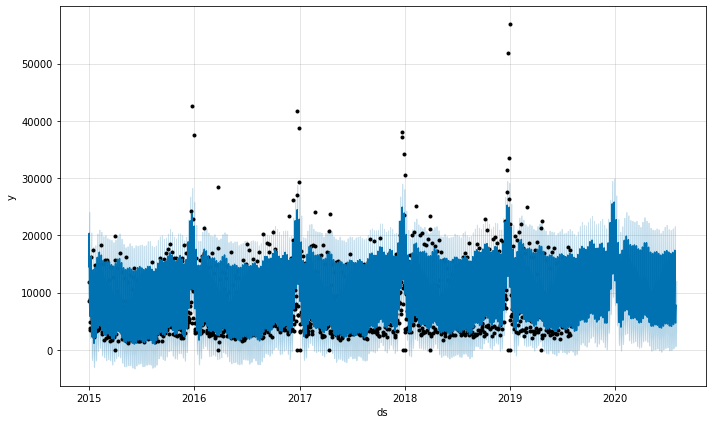

In [17]:
fig1 = m.plot(forecast)

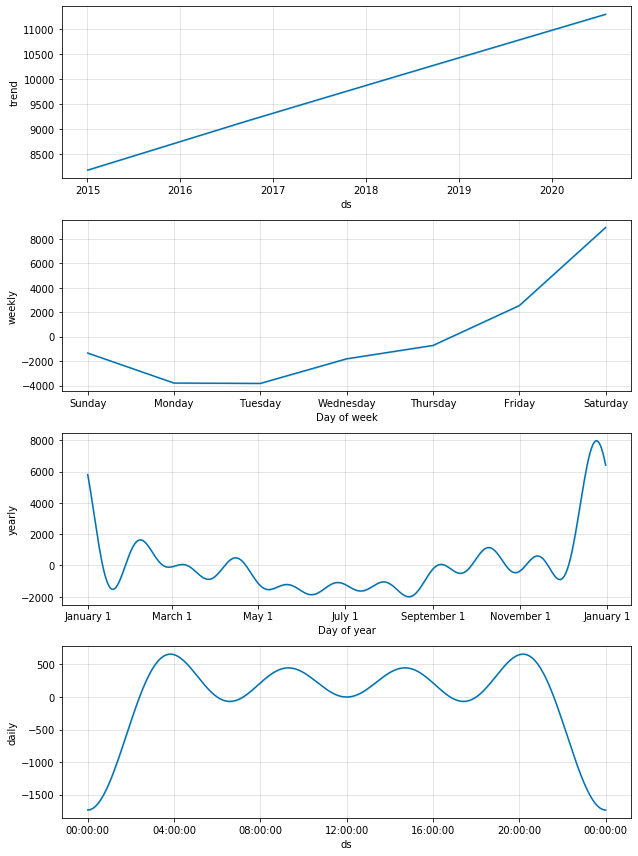

In [18]:
fig2 = m.plot_components(forecast)

In [19]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [20]:
output_excel = forecast.to_excel(r'C:\Users\maria\Desktop\Data Science\01_PROJETO_INTEGRADOR\FORECASTED.xlsx'
                           , index= None, header = True)

In [21]:
linear = data.copy()

In [22]:
linear.head()

DIA       VDA       CMV  MTA
0 2015-01-02   8612.12   7498.66  0.0
1 2015-01-03  11836.79  10337.33  0.0
2 2015-01-04   3874.22   3387.06  0.0
3 2015-01-05   3457.79   3053.94  0.0
4 2015-01-06   8812.50   8644.14  0.0

In [30]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head(20)

INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-02-06 00:00:00 and 2018-07-31 00:00:00


ds          yhat    yhat_lower    yhat_upper         y     cutoff
0  2017-02-07   5613.101744   1894.256990   9522.494947   4517.09 2017-02-06
1  2017-02-08   6926.273367   2984.654940  10709.379833   4522.88 2017-02-06
2  2017-02-09   8099.089337   4282.377094  11674.734267   5337.95 2017-02-06
3  2017-02-10  11664.418376   7900.248813  15540.698614   9182.79 2017-02-06
4  2017-02-11  17178.476973  13529.692926  20869.924817  18108.78 2017-02-06
5  2017-02-12   6689.895966   2861.894635  10311.316673   8357.67 2017-02-06
6  2017-02-13   4544.896606    711.856167   8179.317659   2796.85 2017-02-06
7  2017-02-14   4891.463251   1081.765020   8597.264210   3316.90 2017-02-06
8  2017-02-15   6049.976008   2392.785176  10020.305940   8518.71 2017-02-06
9  2017-02-16   7092.126970   3342.587285  10805.008221  10263.27 2017-02-06
10 2017-02-17  10553.177876   6958.033548  14430.732073  13366.63 2017-02-06
11 2017-02-18  15990.961472  12139.470555  19759.287434  18374.88 2017-02-06
12 2017-02-19   5454.929818   1609.597435   9423.989508   7915.51 2017-02-06
13 2017-02-20   3291.333862   -630.892627   7151.072994   4750.78 2017-02-06
14 2017-02-21   3647.420890   -322.042022   7226.699066   6959.95 2017-02-06
15 2017-02-22   4842.112046   1251.170009   8606.957804  10039.23 2017-02-06
16 2017-02-23   5944.981929   2326.219802   9762.410867  13855.14 2017-02-06
17 2017-02-24   9488.595972   5598.601297  13609.860016  18093.48 2017-02-06
18 2017-02-25  15027.605312  11010.617506  19033.413837  24005.57 2017-02-06
19 2017-02-26   4607.899543    833.716208   8323.530026   7364.58 2017-02-06

In [25]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon           mse         rmse          mae  coverage
0 37 days  7.369153e+06  2714.618406  1877.865039  0.924658
1 38 days  7.321982e+06  2705.916127  1869.642194  0.924658
2 39 days  7.256295e+06  2693.751147  1853.140971  0.924658
3 40 days  7.247452e+06  2692.109251  1858.137868  0.924658
4 41 days  7.284035e+06  2698.895052  1880.310666  0.924658

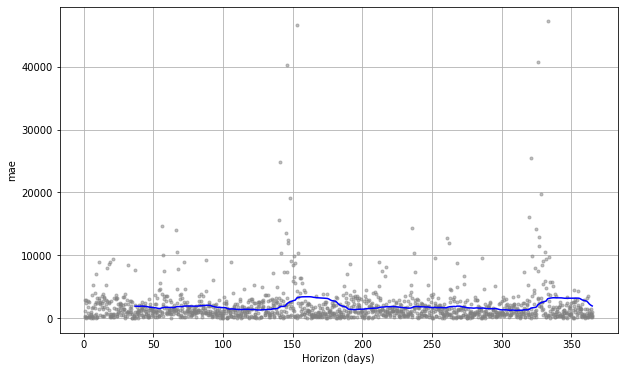

In [31]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')


Testando Linear Regression

In [299]:
def prepare_dataset(data):

    df2 = data.copy()
    df2['ds'] = df2['DIA'] 
    df2['y'] = df2['VDA'] 

    df2 = df2.iloc[:,-2:]
    df2 = df2.set_index("ds")
    
    return df2

In [300]:
prepare_dataset(data)

y
ds                  
2015-01-02   8612.12
2015-01-03  11836.79
2015-01-04   3874.22
2015-01-05   3457.79
2015-01-06   8812.50
2015-01-07   4953.05
2015-01-08   9966.76
2015-01-09  10615.16
2015-01-10  16247.68
2015-01-11   7101.77
2015-01-12   4702.12
2015-01-13   5810.03
2015-01-14   5388.30
2015-01-15   5640.99
2015-01-16  10700.62
2015-01-17  17503.11
2015-01-18   5993.42
2015-01-19   2324.50
2015-01-20   7916.88
2015-01-21  12870.19
2015-01-22   5169.11
2015-01-23   8205.81
2015-01-24  14763.97
2015-01-25   4690.46
2015-01-26   3325.88
2015-01-27   3220.72
2015-01-28   4758.69
2015-01-29   4138.85
2015-01-30   8225.47
2015-01-31  14857.14
...              ...
2019-07-02   4576.78
2019-07-03   5421.70
2019-07-04   7293.47
2019-07-05  11473.18
2019-07-06  15461.38
2019-07-07   7227.85
2019-07-08   5952.61
2019-07-09   3832.59
2019-07-10   5869.13
2019-07-11   5755.21
2019-07-12   8361.71
2019-07-13  14086.19
2019-07-14   5774.86
2019-07-15   3236.73
2019-07-16   4566.55
2019-07-17   3413.32
2019-07-18   4558.03
2019-07-19   7967.53
2019-07-20  17915.14
2019-07-21   5710.79
2019-07-22   2453.89
2019-07-23   2869.42
2019-07-24   6018.87
2019-07-25   6732.03
2019-07-26  10278.07
2019-07-27  17433.34
2019-07-28   6299.95
2019-07-29   2664.87
2019-07-30   4209.87
2019-07-31   6348.06

[1670 rows x 1 columns]

In [268]:
# weather["Temp"] = weather.Temp.astype(float)
# df2['DIA'] =  pd.to_datetime(df2['DIA'], format='%d%b%Y:%H:%M:%S.%f')

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

# Importing metrics

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [302]:
for i in range(1, 32):
    df2["lag_{}".format(i)] = df2.y.shift(i)

In [303]:
df2.tail(10)

y     lag_1     lag_2     lag_3     lag_4     lag_5  \
ds                                                                       
2019-07-22   2453.89   5710.79  17915.14   7967.53   4558.03   3413.32   
2019-07-23   2869.42   2453.89   5710.79  17915.14   7967.53   4558.03   
2019-07-24   6018.87   2869.42   2453.89   5710.79  17915.14   7967.53   
2019-07-25   6732.03   6018.87   2869.42   2453.89   5710.79  17915.14   
2019-07-26  10278.07   6732.03   6018.87   2869.42   2453.89   5710.79   
2019-07-27  17433.34  10278.07   6732.03   6018.87   2869.42   2453.89   
2019-07-28   6299.95  17433.34  10278.07   6732.03   6018.87   2869.42   
2019-07-29   2664.87   6299.95  17433.34  10278.07   6732.03   6018.87   
2019-07-30   4209.87   2664.87   6299.95  17433.34  10278.07   6732.03   
2019-07-31   6348.06   4209.87   2664.87   6299.95  17433.34  10278.07   

               lag_6     lag_7     lag_8     lag_9  ...    lag_24    lag_25  \
ds                                                  ...                       
2019-07-22   4566.55   3236.73   5774.86  14086.19  ...  10324.04   6254.63   
2019-07-23   3413.32   4566.55   3236.73   5774.86  ...  16137.01  10324.04   
2019-07-24   4558.03   3413.32   4566.55   3236.73  ...   6936.46  16137.01   
2019-07-25   7967.53   4558.03   3413.32   4566.55  ...   3927.31   6936.46   
2019-07-26  17915.14   7967.53   4558.03   3413.32  ...   4576.78   3927.31   
2019-07-27   5710.79  17915.14   7967.53   4558.03  ...   5421.70   4576.78   
2019-07-28   2453.89   5710.79  17915.14   7967.53  ...   7293.47   5421.70   
2019-07-29   2869.42   2453.89   5710.79  17915.14  ...  11473.18   7293.47   
2019-07-30   6018.87   2869.42   2453.89   5710.79  ...  15461.38  11473.18   
2019-07-31   6732.03   6018.87   2869.42   2453.89  ...   7227.85  15461.38   

              lag_26    lag_27    lag_28    lag_29    lag_30    lag_31  \
ds                                                                       
2019-07-22   5603.58   2997.13   1880.53   4455.01  13380.07  10450.99   
2019-07-23   6254.63   5603.58   2997.13   1880.53   4455.01  13380.07   
2019-07-24  10324.04   6254.63   5603.58   2997.13   1880.53   4455.01   
2019-07-25  16137.01  10324.04   6254.63   5603.58   2997.13   1880.53   
2019-07-26   6936.46  16137.01  10324.04   6254.63   5603.58   2997.13   
2019-07-27   3927.31   6936.46  16137.01  10324.04   6254.63   5603.58   
2019-07-28   4576.78   3927.31   6936.46  16137.01  10324.04   6254.63   
2019-07-29   5421.70   4576.78   3927.31   6936.46  16137.01  10324.04   
2019-07-30   7293.47   5421.70   4576.78   3927.31   6936.46  16137.01   
2019-07-31  11473.18   7293.47   5421.70   4576.78   3927.31   6936.46   

            weekday  is_weekend  
ds                               
2019-07-22        0           0  
2019-07-23        1           0  
2019-07-24        2           0  
2019-07-25        3           0  
2019-07-26        4           0  
2019-07-27        5           1  
2019-07-28        6           1  
2019-07-29        0           0  
2019-07-30        1           0  
2019-07-31        2           0  

[10 rows x 34 columns]

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit 

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [305]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [311]:
def split(data):
    
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
    
    return X_train, X_test, y_train, y_test

split(df2)

(               lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
 ds                                                                       
 2015-02-02   4833.49  14857.14   8225.47   4138.85   4758.69   3220.72   
 2015-02-03   4094.59   4833.49  14857.14   8225.47   4138.85   4758.69   
 2015-02-04   3395.87   4094.59   4833.49  14857.14   8225.47   4138.85   
 2015-02-05   4549.44   3395.87   4094.59   4833.49  14857.14   8225.47   
 2015-02-06   5645.49   4549.44   3395.87   4094.59   4833.49  14857.14   
 2015-02-07   9600.79   5645.49   4549.44   3395.87   4094.59   4833.49   
 2015-02-08  14984.84   9600.79   5645.49   4549.44   3395.87   4094.59   
 2015-02-09   5120.74  14984.84   9600.79   5645.49   4549.44   3395.87   
 2015-02-10   3803.96   5120.74  14984.84   9600.79   5645.49   4549.44   
 2015-02-11   5350.30   3803.96   5120.74  14984.84   9600.79   5645.49   
 2015-02-12   6138.45   5350.30   3803.96   5120.74  14984.84   9600.79   
 2015-02-13   6676.32   6

In [312]:
df2.shape

(1670, 34)

In [313]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [314]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

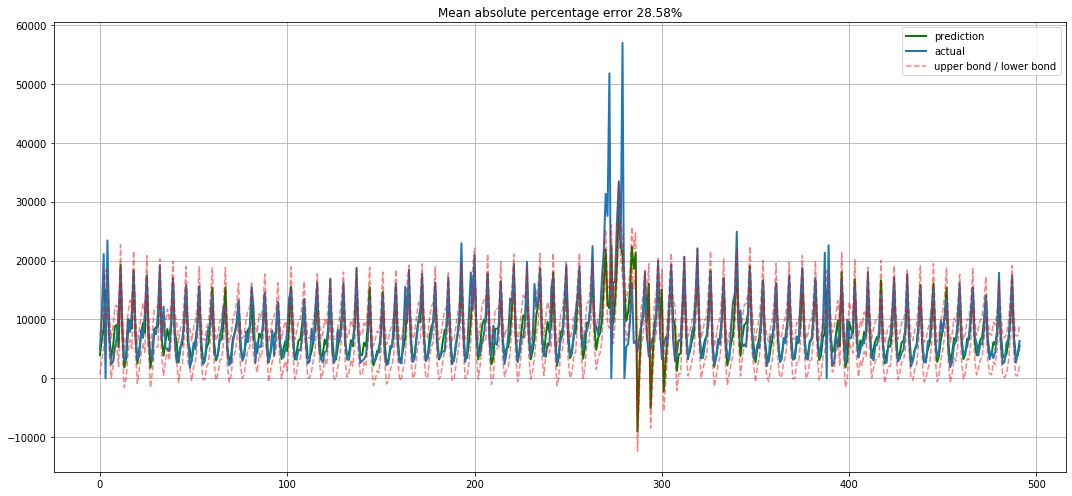

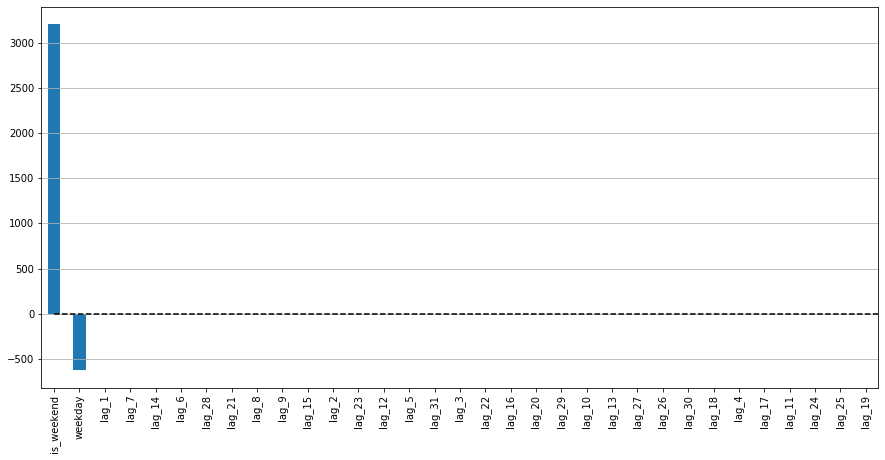

In [315]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

Adicionando colunas de tempo

In [319]:
prepare_dataset(data)

for i in range(1, 32):
    df2["lag_{}".format(i)] = df2.y.shift(i)

def add_date_params(data):
    
    data.index = pd.to_datetime(data.index)
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    return data

add_date_params(df2)

y     lag_1     lag_2     lag_3     lag_4     lag_5  \
ds                                                                       
2015-01-02   8612.12       NaN       NaN       NaN       NaN       NaN   
2015-01-03  11836.79   8612.12       NaN       NaN       NaN       NaN   
2015-01-04   3874.22  11836.79   8612.12       NaN       NaN       NaN   
2015-01-05   3457.79   3874.22  11836.79   8612.12       NaN       NaN   
2015-01-06   8812.50   3457.79   3874.22  11836.79   8612.12       NaN   
2015-01-07   4953.05   8812.50   3457.79   3874.22  11836.79   8612.12   
2015-01-08   9966.76   4953.05   8812.50   3457.79   3874.22  11836.79   
2015-01-09  10615.16   9966.76   4953.05   8812.50   3457.79   3874.22   
2015-01-10  16247.68  10615.16   9966.76   4953.05   8812.50   3457.79   
2015-01-11   7101.77  16247.68  10615.16   9966.76   4953.05   8812.50   
2015-01-12   4702.12   7101.77  16247.68  10615.16   9966.76   4953.05   
2015-01-13   5810.03   4702.12   7101.77  16247.68  10615.16   9966.76   
2015-01-14   5388.30   5810.03   4702.12   7101.77  16247.68  10615.16   
2015-01-15   5640.99   5388.30   5810.03   4702.12   7101.77  16247.68   
2015-01-16  10700.62   5640.99   5388.30   5810.03   4702.12   7101.77   
2015-01-17  17503.11  10700.62   5640.99   5388.30   5810.03   4702.12   
2015-01-18   5993.42  17503.11  10700.62   5640.99   5388.30   5810.03   
2015-01-19   2324.50   5993.42  17503.11  10700.62   5640.99   5388.30   
2015-01-20   7916.88   2324.50   5993.42  17503.11  10700.62   5640.99   
2015-01-21  12870.19   7916.88   2324.50   5993.42  17503.11  10700.62   
2015-01-22   5169.11  12870.19   7916.88   2324.50   5993.42  17503.11   
2015-01-23   8205.81   5169.11  12870.19   7916.88   2324.50   5993.42   
2015-01-24  14763.97   8205.81   5169.11  12870.19   7916.88   2324.50   
2015-01-25   4690.46  14763.97   8205.81   5169.11  12870.19   7916.88   
2015-01-26   3325.88   4690.46  14763.97   8205.81   5169.11  12870.19   
2015-01-27   3220.72   3325.88   4690.46  14763.97   8205.81   5169.11   
2015-01-28   4758.69   3220.72   3325.88   4690.46  14763.97   8205.81   
2015-01-29   4138.85   4758.69   3220.72   3325.88   4690.46  14763.97   
2015-01-30   8225.47   4138.85   4758.69   3220.72   3325.88   4690.46   
2015-01-31  14857.14   8225.47   4138.85   4758.69   3220.72   3325.88   
...              ...       ...       ...       ...       ...       ...   
2019-07-02   4576.78   3927.31   6936.46  16137.01  10324.04   6254.63   
2019-07-03   5421.70   4576.78   3927.31   6936.46  16137.01  10324.04   
2019-07-04   7293.47   5421.70   4576.78   3927.31   6936.46  16137.01   
2019-07-05  11473.18   7293.47   5421.70   4576.78   3927.31   6936.46   
2019-07-06  15461.38  11473.18   7293.47   5421.70   4576.78   3927.31   
2019-07-07   7227.85  15461.38  11473.18   7293.47   5421.70   4576.78   
2019-07-08   5952.61   7227.85  15461.38  11473.18   7293.47   5421.70   
2019-07-09   3832.59   5952.61   7227.85  15461.38  11473.18   7293.47   
2019-07-10   5869.13   3832.59   5952.61   7227.85  15461.38  11473.18   
2019-07-11   5755.21   5869.13   3832.59   5952.61   7227.85  15461.38   
2019-07-12   8361.71   5755.21   5869.13   3832.59   5952.61   7227.85   
2019-07-13  14086.19   8361.71   5755.21   5869.13   3832.59   5952.61   
2019-07-14   5774.86  14086.19   8361.71   5755.21   5869.13   3832.59   
2019-07-15   3236.73   5774.86  14086.19   8361.71   5755.21   5869.13   
2019-07-16   4566.55   3236.73   5774.86  14086.19   8361.71   5755.21   
2019-07-17   3413.32   4566.55   3236.73   5774.86  14086.19   8361.71   
2019-07-18   4558.03   3413.32   4566.55   3236.73   5774.86  14086.19   
2019-07-19   7967.53   4558.03   3413.32   4566.55   3236.73   5774.86   
2019-07-20  17915.14   7967.53   4558.03   3413.32   4566.55   3236.73   
2019-07-21   5710.79  17915.14   7967.53   4558.03   3413.32   4566.55   
2019-07-22   2453.89   5710.79  17915.14   7967.53   4558.03   3413.32   
2019-07-23   2869.42   

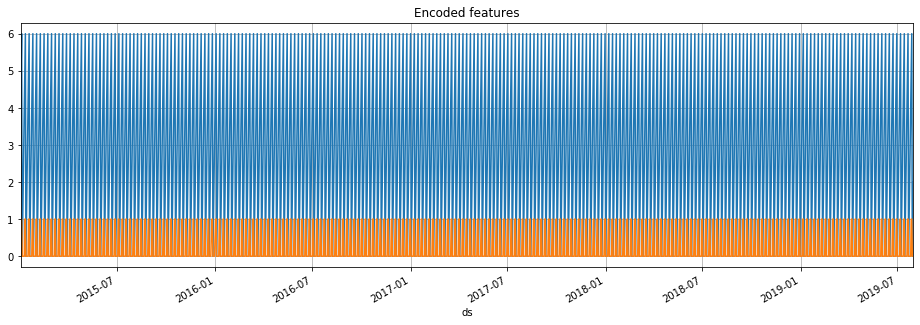

In [320]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
df2.weekday.plot()
df2.is_weekend.plot()
plt.grid(True);

In [322]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

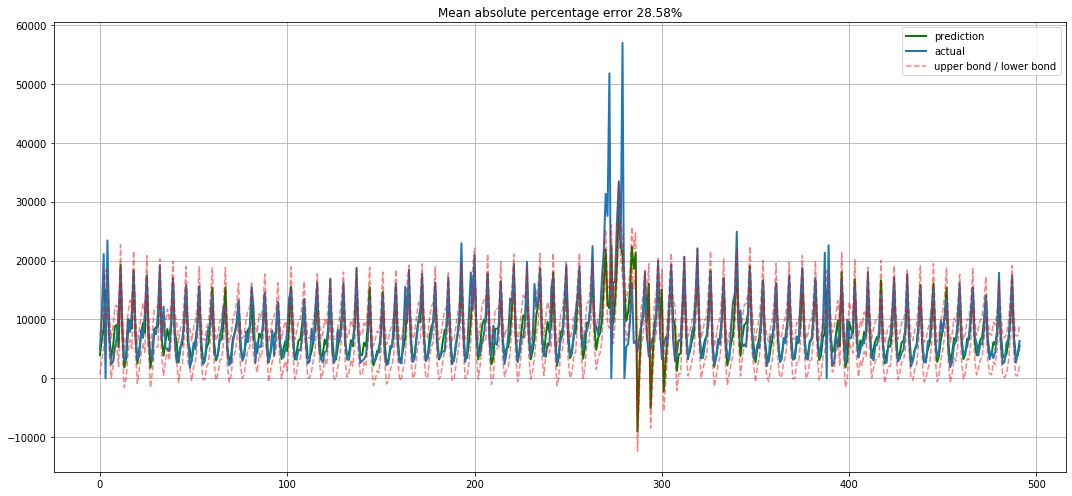

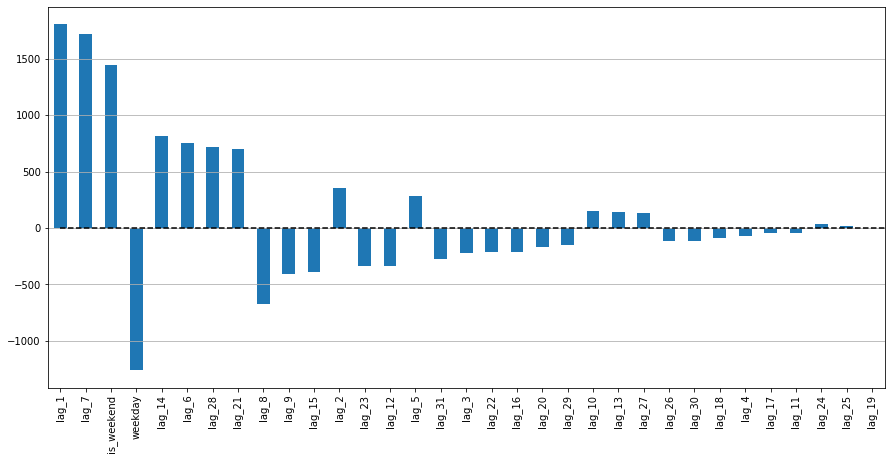

In [323]:
split(df2)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

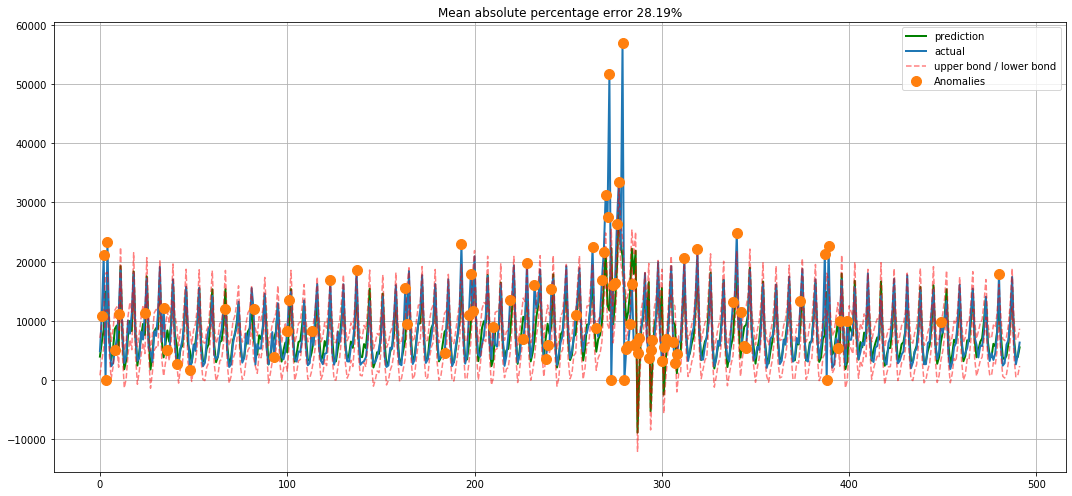

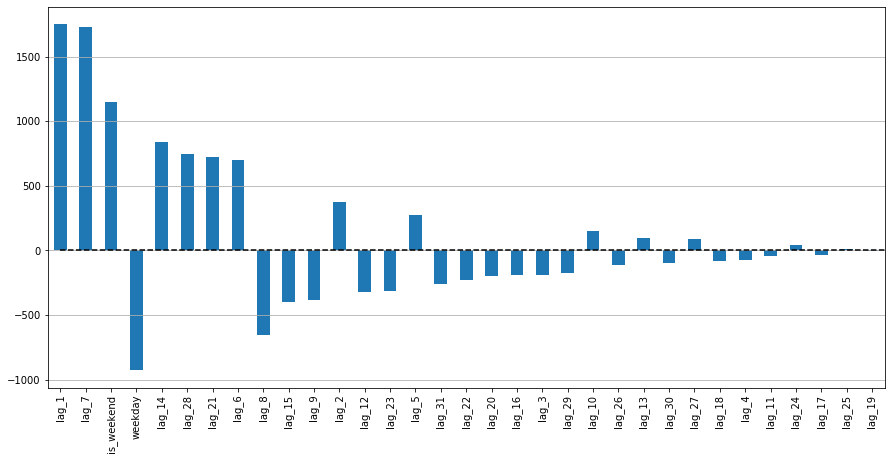

In [324]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 81967.36610455113, tolerance: 56552.18734686969

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 64737.15631412249, tolerance: 56552.18734686969



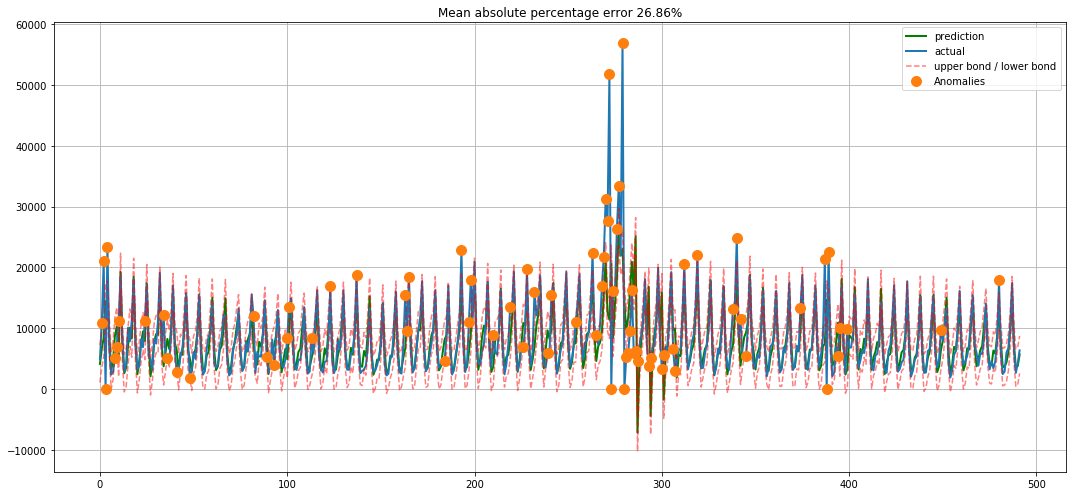

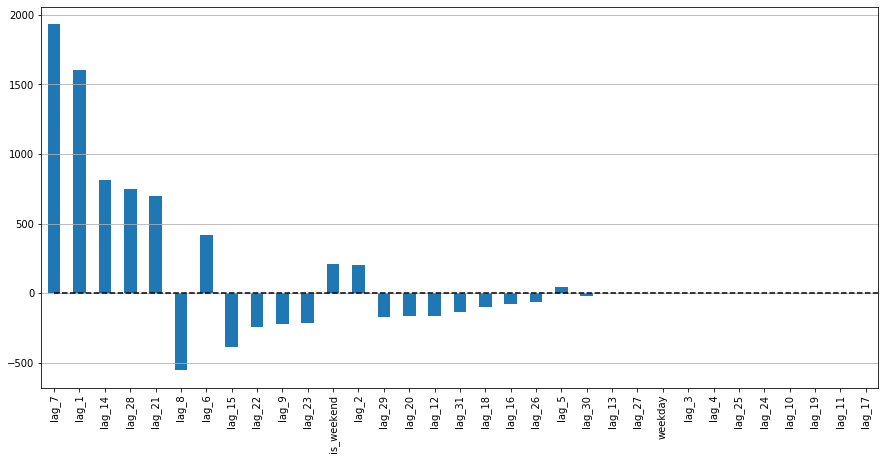

In [325]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

In [328]:
! pip3 install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20:16:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20:16:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


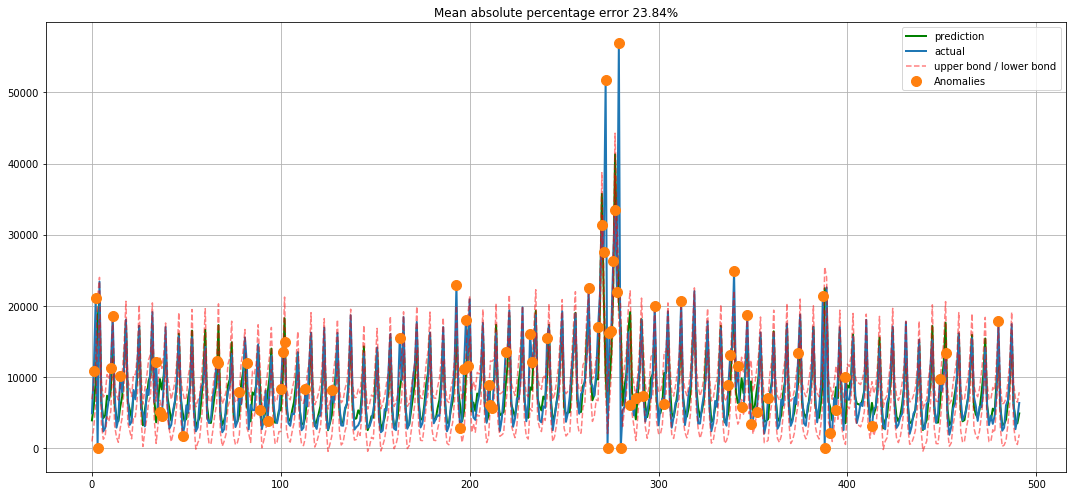

In [330]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train);

plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

Adicionando Feriados

In [378]:
path = r'C:\Users\maria\Desktop\Data Science\01_PROJETO_INTEGRADOR\HISTORICO_2.xlsx'
data = pd.read_excel(path, sheet_name = 'SQL Results',delimiter = ',')

In [379]:
df2 = data.copy()
df2['ds'] = df2['DIA'] 
df2['y'] = df2['VDA'] 

In [380]:
df2.head()

DIA       VDA       CMV  MTA  DIA_SEMANA TIPO_FERIADO  FERIADO_BOOL  \
0 2015-01-02   8612.12   7498.66  0.0           6            0             0   
1 2015-01-03  11836.79  10337.33  0.0           7            0             0   
2 2015-01-04   3874.22   3387.06  0.0           1            0             0   
3 2015-01-05   3457.79   3053.94  0.0           2            0             0   
4 2015-01-06   8812.50   8644.14  0.0           3            0             0   

          ds         y  
0 2015-01-02   8612.12  
1 2015-01-03  11836.79  
2 2015-01-04   3874.22  
3 2015-01-05   3457.79  
4 2015-01-06   8812.50

In [381]:
df2.drop(['DIA','CMV', 'VDA', 'MTA', 'TIPO_FERIADO'], axis = 1, inplace=True)
df2.head()

DIA_SEMANA  FERIADO_BOOL         ds         y
0           6             0 2015-01-02   8612.12
1           7             0 2015-01-03  11836.79
2           1             0 2015-01-04   3874.22
3           2             0 2015-01-05   3457.79
4           3             0 2015-01-06   8812.50

In [382]:
# df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2['DIA_SEMANA'])], axis =1)
df2.head()

DIA_SEMANA  FERIADO_BOOL         ds         y  1  2  3  4  5  6  7
0           6             0 2015-01-02   8612.12  0  0  0  0  0  1  0
1           7             0 2015-01-03  11836.79  0  0  0  0  0  0  1
2           1             0 2015-01-04   3874.22  1  0  0  0  0  0  0
3           2             0 2015-01-05   3457.79  0  1  0  0  0  0  0
4           3             0 2015-01-06   8812.50  0  0  1  0  0  0  0

In [383]:
df2.drop(['DIA_SEMANA'], axis = 1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 10 columns):
FERIADO_BOOL    1670 non-null int64
ds              1670 non-null datetime64[ns]
y               1670 non-null float64
1               1670 non-null uint8
2               1670 non-null uint8
3               1670 non-null uint8
4               1670 non-null uint8
5               1670 non-null uint8
6               1670 non-null uint8
7               1670 non-null uint8
dtypes: datetime64[ns](1), float64(1), int64(1), uint8(7)
memory usage: 50.6 KB


In [384]:
df2.describe().T

count         mean          std  min        25%      50%  \
FERIADO_BOOL  1670.0     0.031138     0.173742  0.0     0.0000     0.00   
y             1670.0  7666.805545  5622.961692  0.0  3804.3525  5972.28   
1             1670.0     0.143114     0.350294  0.0     0.0000     0.00   
2             1670.0     0.143114     0.350294  0.0     0.0000     0.00   
3             1670.0     0.143114     0.350294  0.0     0.0000     0.00   
4             1670.0     0.143114     0.350294  0.0     0.0000     0.00   
5             1670.0     0.142515     0.349682  0.0     0.0000     0.00   
6             1670.0     0.141916     0.349069  0.0     0.0000     0.00   
7             1670.0     0.143114     0.350294  0.0     0.0000     0.00   

                  75%       max  
FERIADO_BOOL     0.00      1.00  
y             9849.37  56959.83  
1                0.00      1.00  
2                0.00      1.00  
3                0.00      1.00  
4                0.00      1.00  
5                0.00      1.00  
6                0.00      1.00  
7                0.00      1.00

In [385]:
df2.corr()

FERIADO_BOOL         y         1         2         3         4  \
FERIADO_BOOL      1.000000 -0.049364 -0.024040  0.035029  0.025184 -0.024040   
y                -0.049364  1.000000 -0.096226 -0.274671 -0.276932 -0.130897   
1                -0.024040 -0.096226  1.000000 -0.167016 -0.167016 -0.167016   
2                 0.035029 -0.274671 -0.167016  1.000000 -0.167016 -0.167016   
3                 0.025184 -0.276932 -0.167016 -0.167016  1.000000 -0.167016   
4                -0.024040 -0.130897 -0.167016 -0.167016 -0.167016  1.000000   
5                 0.025535 -0.051692 -0.166608 -0.166608 -0.166608 -0.166608   
6                 0.025887  0.181216 -0.166200 -0.166200 -0.166200 -0.166200   
7                -0.063419  0.649746 -0.167016 -0.167016 -0.167016 -0.167016   

                     5         6         7  
FERIADO_BOOL  0.025535  0.025887 -0.063419  
y            -0.051692  0.181216  0.649746  
1            -0.166608 -0.166200 -0.167016  
2            -0.166608 -0.166200 -0.167016  
3            -0.166608 -0.166200 -0.167016  
4            -0.166608 -0.166200 -0.167016  
5             1.000000 -0.165794 -0.166608  
6            -0.165794  1.000000 -0.166200  
7            -0.166608 -0.166200  1.000000

In [386]:
 df2 = df2.set_index("ds")

In [387]:
for i in range(1, 7):
    df2["lag_{}".format(i)] = df2.y.shift(i)

In [388]:
df2.head()

FERIADO_BOOL         y  1  2  3  4  5  6  7     lag_1     lag_2  \
ds                                                                            
2015-01-02             0   8612.12  0  0  0  0  0  1  0       NaN       NaN   
2015-01-03             0  11836.79  0  0  0  0  0  0  1   8612.12       NaN   
2015-01-04             0   3874.22  1  0  0  0  0  0  0  11836.79   8612.12   
2015-01-05             0   3457.79  0  1  0  0  0  0  0   3874.22  11836.79   
2015-01-06             0   8812.50  0  0  1  0  0  0  0   3457.79   3874.22   

               lag_3    lag_4  lag_5  lag_6  
ds                                           
2015-01-02       NaN      NaN    NaN    NaN  
2015-01-03       NaN      NaN    NaN    NaN  
2015-01-04       NaN      NaN    NaN    NaN  
2015-01-05   8612.12      NaN    NaN    NaN  
2015-01-06  11836.79  8612.12    NaN    NaN

In [389]:
add_date_params(df2)

FERIADO_BOOL         y  1  2  3  4  5  6  7     lag_1     lag_2  \
ds                                                                            
2015-01-02             0   8612.12  0  0  0  0  0  1  0       NaN       NaN   
2015-01-03             0  11836.79  0  0  0  0  0  0  1   8612.12       NaN   
2015-01-04             0   3874.22  1  0  0  0  0  0  0  11836.79   8612.12   
2015-01-05             0   3457.79  0  1  0  0  0  0  0   3874.22  11836.79   
2015-01-06             0   8812.50  0  0  1  0  0  0  0   3457.79   3874.22   
2015-01-07             0   4953.05  0  0  0  1  0  0  0   8812.50   3457.79   
2015-01-08             0   9966.76  0  0  0  0  1  0  0   4953.05   8812.50   
2015-01-09             0  10615.16  0  0  0  0  0  1  0   9966.76   4953.05   
2015-01-10             0  16247.68  0  0  0  0  0  0  1  10615.16   9966.76   
2015-01-11             0   7101.77  1  0  0  0  0  0  0  16247.68  10615.16   
2015-01-12             0   4702.12  0  1  0  0  0  0  0   7101.77  16247.68   
2015-01-13             0   5810.03  0  0  1  0  0  0  0   4702.12   7101.77   
2015-01-14             0   5388.30  0  0  0  1  0  0  0   5810.03   4702.12   
2015-01-15             0   5640.99  0  0  0  0  1  0  0   5388.30   5810.03   
2015-01-16             0  10700.62  0  0  0  0  0  1  0   5640.99   5388.30   
2015-01-17             0  17503.11  0  0  0  0  0  0  1  10700.62   5640.99   
2015-01-18             0   5993.42  1  0  0  0  0  0  0  17503.11  10700.62   
2015-01-19             0   2324.50  0  1  0  0  0  0  0   5993.42  17503.11   
2015-01-20             0   7916.88  0  0  1  0  0  0  0   2324.50   5993.42   
2015-01-21             0  12870.19  0  0  0  1  0  0  0   7916.88   2324.50   
2015-01-22             0   5169.11  0  0  0  0  1  0  0  12870.19   7916.88   
2015-01-23             0   8205.81  0  0  0  0  0  1  0   5169.11  12870.19   
2015-01-24             0  14763.97  0  0  0  0  0  0  1   8205.81   5169.11   
2015-01-25             0   4690.46  1  0  0  0  0  0  0  14763.97   8205.81   
2015-01-26             0   3325.88  0  1  0  0  0  0  0   4690.46  14763.97   
2015-01-27             0   3220.72  0  0  1  0  0  0  0   3325.88   4690.46   
2015-01-28             0   4758.69  0  0  0  1  0  0  0   3220.72   3325.88   
2015-01-29             0   4138.85  0  0  0  0  1  0  0   4758.69   3220.72   
2015-01-30             0   8225.47  0  0  0  0  0  1  0   4138.85   4758.69   
2015-01-31             0  14857.14  0  0  0  0  0  0  1   8225.47   4138.85   
...                  ...       ... .. .. .. .. .. .. ..       ...       ...   
2019-07-02             0   4576.78  0  0  1  0  0  0  0   3927.31   6936.46   
2019-07-03             0   5421.70  0  0  0  1  0  0  0   4576.78   3927.31   
2019-07-04             0   7293.47  0  0  0  0  1  0  0   5421.70   4576.78   
2019-07-05             0  11473.18  0  0  0  0  0  1  0   7293.47   5421.70   
2019-07-06             0  15461.38  0  0  0  0  0  0  1  11473.18   7293.47   
2019-07-07             0   7227.85  1  0  0  0  0  0  0  15461.38  11473.18   
2019-07-08             0   5952.61  0  1  0  0  0  0  0   7227.85  15461.38   
2019-07-09             0   3832.59  0  0  1  0  0  0  0   5952.61   7227.85   
2019-07-10             0   5869.13  0  0  0  1  0  0  0   3832.59   5952.61   
2019-07-11             0   5755.21  0  0  0  0  1  0  0   5869.13   3832.59   
2019-07-12             0   8361.71  0  0  0  0  0  1  0   5755.21   5869.13   
2019-07-13             0  14086.19  0  0  0  0  0  0  1   8361.71   5755.21   
2019-07-14             0   5774.86  1  0  0  0  0  0  0  14086.19   8361.71   
2019-07-15             0   3236.73  0  1  0  0  0  0  0   5774.86  14086.19   
2019-07-16             0   4566.55  0  0  1  0  0  0  0   3236.73   5774.86   
2019-07-17             0   3413.32  0  0  0  1  0  0  0   4566.55   3236.73   
2019-07-18             0   4558.03  0  0  0  0  1  0  0   3413.32   4566.55   
2019-07-19             0   7967.53  0  0  0  0  0  1  0   4558

In [390]:
df2.drop(['weekday'], axis =1, inplace=True)

In [391]:
split(df2)

(            FERIADO_BOOL  1  2  3  4  5  6  7     lag_1     lag_2     lag_3  \
 ds                                                                            
 2015-01-08             0  0  0  0  0  1  0  0   4953.05   8812.50   3457.79   
 2015-01-09             0  0  0  0  0  0  1  0   9966.76   4953.05   8812.50   
 2015-01-10             0  0  0  0  0  0  0  1  10615.16   9966.76   4953.05   
 2015-01-11             0  1  0  0  0  0  0  0  16247.68  10615.16   9966.76   
 2015-01-12             0  0  1  0  0  0  0  0   7101.77  16247.68  10615.16   
 2015-01-13             0  0  0  1  0  0  0  0   4702.12   7101.77  16247.68   
 2015-01-14             0  0  0  0  1  0  0  0   5810.03   4702.12   7101.77   
 2015-01-15             0  0  0  0  0  1  0  0   5388.30   5810.03   4702.12   
 2015-01-16             0  0  0  0  0  0  1  0   5640.99   5388.30   5810.03   
 2015-01-17             0  0  0  0  0  0  0  1  10700.62   5640.99   5388.30   
 2015-01-18             0  1  0  0  0  0

In [392]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20:48:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\maria\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[20:48:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:48:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


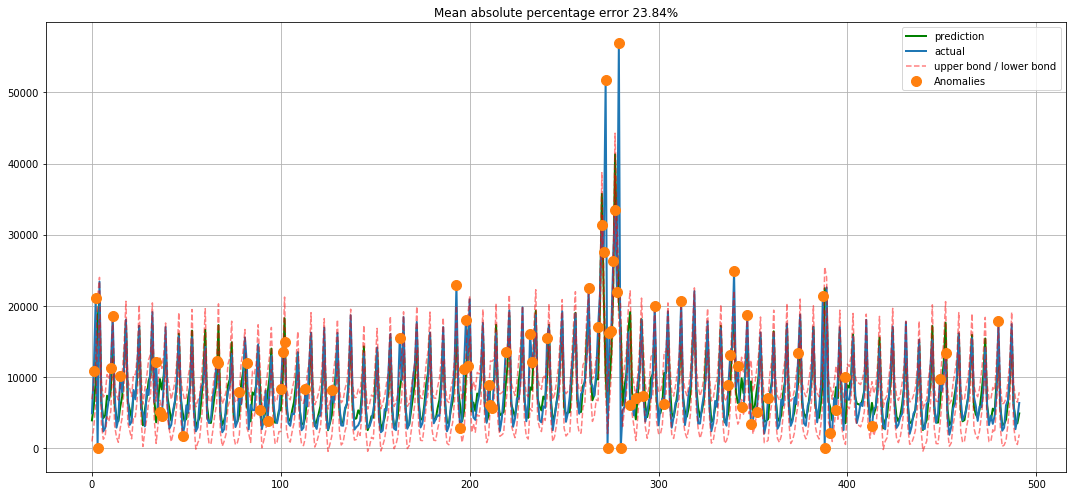

In [393]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train);

plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 81967.36610455113, tolerance: 56552.18734686969

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 64737.15631412249, tolerance: 56552.18734686969



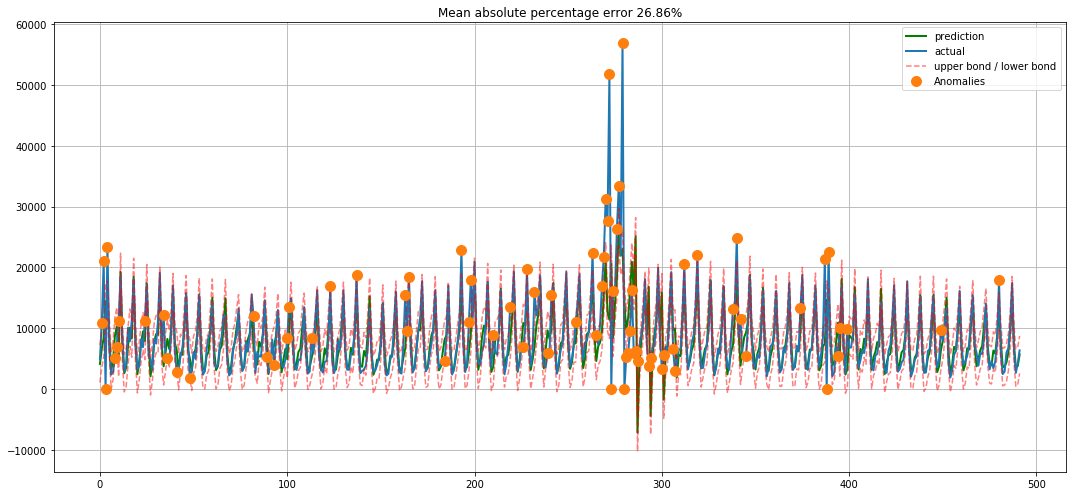

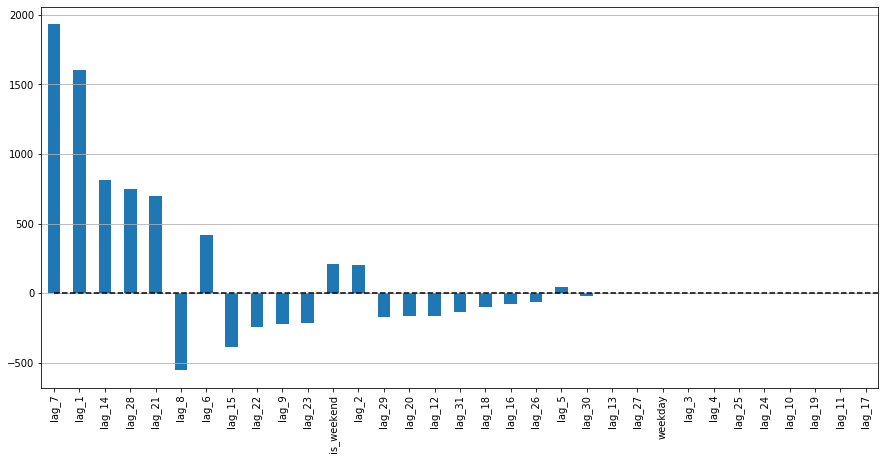

In [394]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

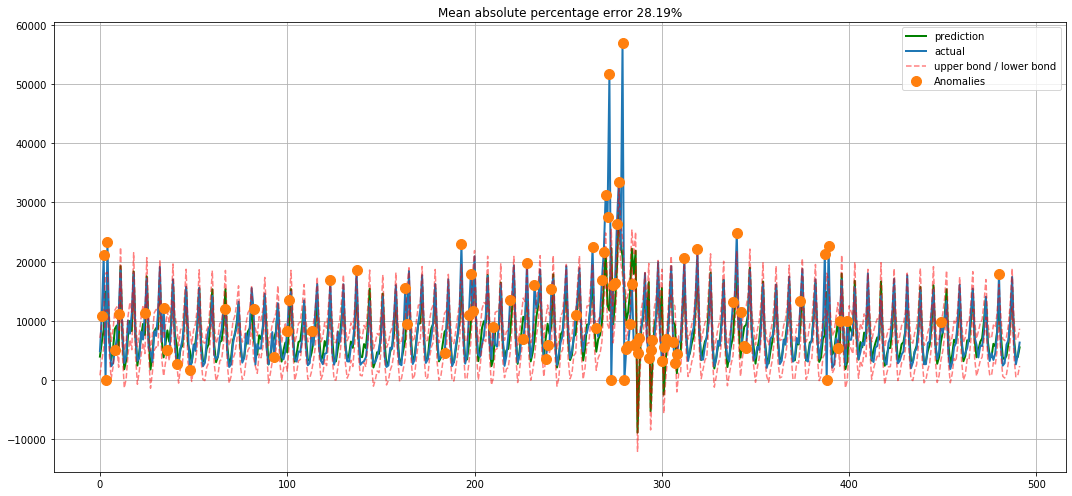

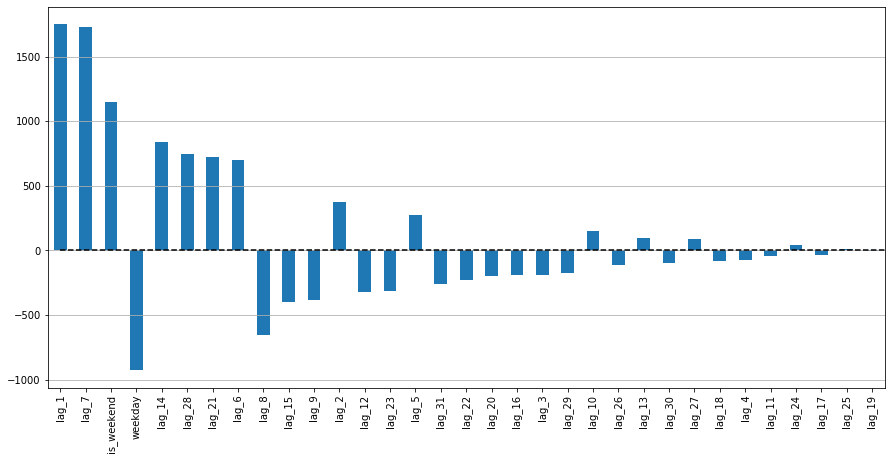

In [395]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

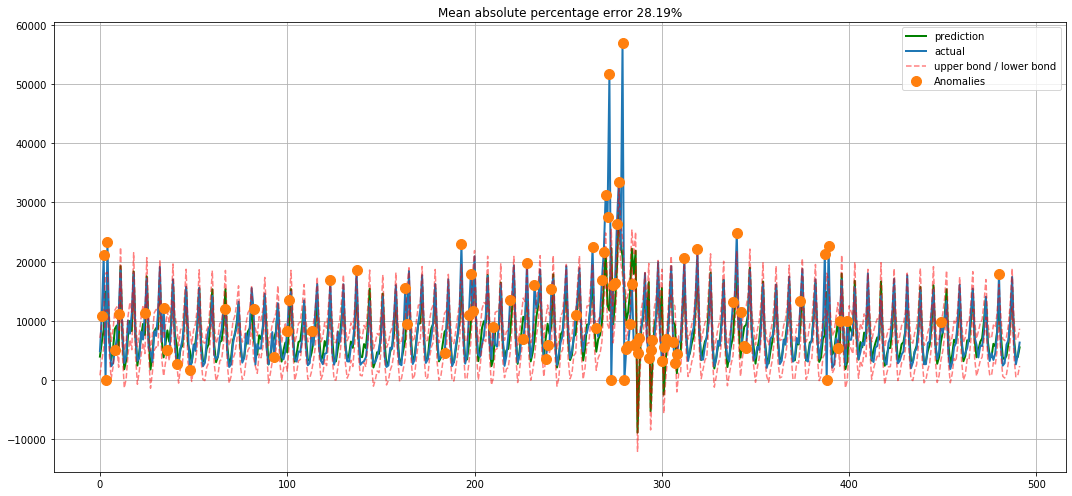

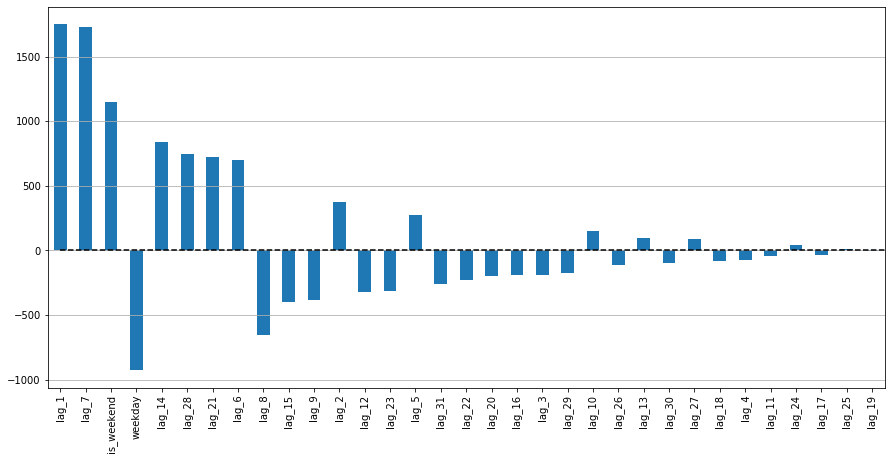

In [396]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

In [399]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test)

rf_val_mae = mean_absolute_error(y_pred, y_test)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Validation MAE for Random Forest Model: 19931.609386178858


AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

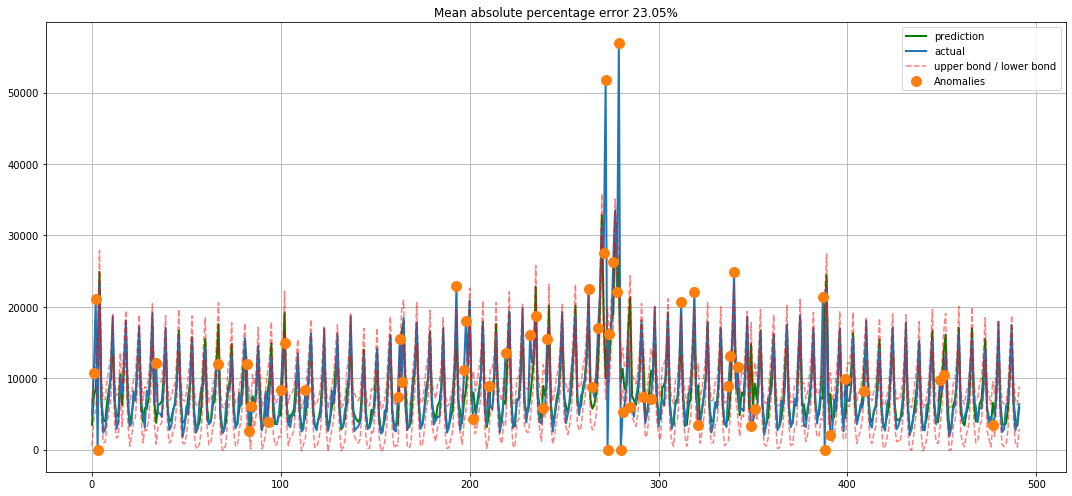

In [401]:
plotModelResults(rf_model, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(rf_model)